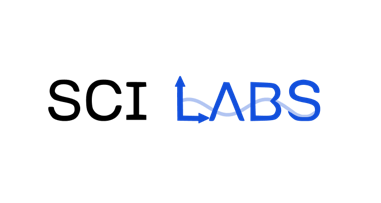

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mióny - prečo ich môžeme detekovať na povrchu Zeme?

Mión je nestabilné subaotmanie častice s polčasom rozpadu $\tau = 2.2$ $\mu \text{s}$. Jedným zo zdrojov miónov je kozmické žiarenie, ktoré ich vytvára vo vyšších vrtvách armosféry. Po svojom vzniku vo vyššej atmosfére má rýchlosť ktorá môže dosahovať až 99,97% rýchlosti svetla ($v_\mu = 0.9997 c$). Ak by mióny touto rýchlosťou leteli smerom k povrchu Zeme, dorazila by aspoň polovica k povrchu Zeme podľa klasickej fyziky? A čo nám k tomu povie špeciálna teória relativity?

Ak mióny majú rýchlosť $v = 0.9997 c$ (kde $c = 299 792 458$ m/s) z výšky $v = 10$ km a polčasom rozpadu $\tau = 2.2$ $\mu\text{s}$ kam dorazí polovica do akej vzdialenosti dorazí aspoň polovica z miónov? To nám povie vzorček z klasickej mechaniky

\begin{equation*}
 d = 1/2 \cdot \tau \cdot v = 1/2 \cdot \tau \cdot 0.9997 \cdot c
\end{equation*}

In [ ]:
# Premenné:
c = 299792458
v = 0.9997*c
tau = 2.2e-6

d = 1/2*tau*v       # Vzdialenosť, ktorú prejde polovica miónov (tzv. polodráha – nie je to zavedený pojem, ale pojem, ktorý nám má uľahčiť prácu)

print(f"Vzdialenosť, ktorú prejde polovica miónov (hovorme jej „polodráha“ rozpadu) je {d:,.2f} m")

pocet_polodrah = 10000/d

print(f"Mióny urazily {pocet_polodrah:,.2f} než dorazili k povrchu Zeme. Tým pádom tento let „prežilo“ len {100*0.5**pocet_polodrah:,.9f} %")

Vzdialenosť, ktorú prejde polovica miónov (hovorme jej „polodráha“ rozpadu) je 329.67 m
Mióny urazily 30.33 než dorazili k povrchu Zeme. Tým pádom tento let „prežilo“ len 0.000000074 %


Vypočítali sme "polodráhu" rozpadu (dráhu, ktorú mióny s rýchlosťou $v$ prejde, a po ktorej sa ich polovica rozpadne). Celková dráha, ktorú treba prekonať je $h = 10$ km. To znamená, že mióny prejde $\frac{10000}{329.67}$ polodráh rozpadu ak Zemi ich dorazí len malý zlomok. To sa ale v skutočnosti nedeje ak povrvhu Zeme by ich dorazilo oveľa viac. Prečo? Odpoveď na túto otázku nám poskytnú dôsledky špeciálnej teórie relativity – dilatácia času a kontrakcie dĺžok.

Dilatácia času a kontrakcie dĺžok sú javy, ktoré sa prejavujú pri objektoch pohybujúcich sa vysokou rýchlosťou (riadovo porovnateľnou s rýchlosťou svetla). Zjednodušene môžeme dilatáciu času popísať takto – hodinky, ktoré by mióny mali pri sebe, budú tikať pomalšie ako tie, ktoré budeme mať my na Zemi. A to presne $\gamma$-krát.

\begin{equation*}
 \gamma = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}}
\end{equation*}

Pre nás to znamená to, že polčas rozpadu $\tau$ sa pre pozorovateľov na Zemi predĺži podľa vzorca pre dilatáciu času

\begin{equation*}
 \tau' = \gamma \tau = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}} \cdot \tau,
\end{equation*}
kde $\tau'$ je polčas rozpadu miónov pre pozorovateľov spojených so Zemou.


Kontrakcia dĺžok sa v tomto prípade naopak prejaví ako skrátenie vzdialenosti, ktorú mióny prejde. Vzorec pre kontrakciu dĺžok je

\begin{equation*}
 l' = \frac{l}{\gamma} = \sqrt{1-\frac{v^2}{c^2}} \cdot l,
\end{equation*}
kde $l$ je výška, v ktorej sa mióny vytvorili pre pozorovateľov na Zemi, a $l'$ je výška, ako by ju zmerali samotné mióny.

Ako kontrakcie dĺžok, tak aj dilatácie času sú dva rôzne pohľady na tento jav, ktoré sú ekvivalentné. A to si teraz ukážeme.

In [ ]:
#definujeme si funkciu gamma

def gamma(v):
    return(np.sqrt(1/(1-(v/c)**2)))

# Člen $\gamma$

Člen gamma sa objavuje v vzorci pre časovú dilatáciu, tak pre kontrakciu dĺžok a záleží len na rýchlosti. Skúsime si ho zobraziť v grafe!

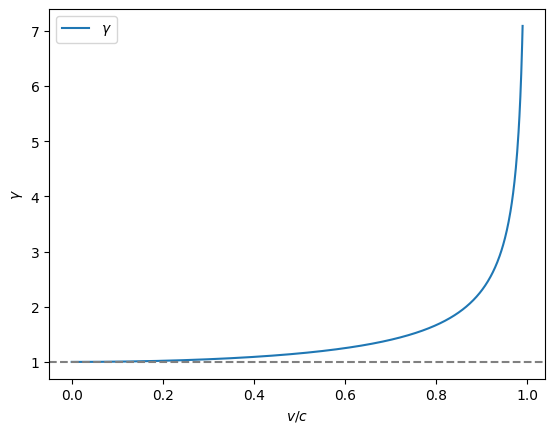

In [ ]:
v = np.linspace(0,0.99,1000)                            # Rozsah rýchlostí v grafe (v násoboch rýchlosti svetla)
plt.plot(v,gamma(v*c), label = r"$\gamma$")
plt.axhline(1, color = "gray", linestyle = "--")

plt.xlabel("$v/c$")
plt.ylabel(r"$\gamma$")

plt.legend()

Ako môžeme vidieť z grafu, tak sa kontrakcia dĺžok alebo dilatácia času výrazne prejaví len pri objektoch s rýchlosťou $v > 0.1 \cdot c$ (pre objekty s rýchlosťou $v = 0.1 \cdot c$ platí $\gamma \approx 1.005$) . Preto tieto efekty v každodennom živote nepozorujeme. Poďme teraz spočítať polčas rozpadu nášho miónu pre pozorovateľov na Zemi.

## Dilatácia času

In [ ]:
# Definujeme si funkciu pre výpočet dilatácie času

def dilatacia_casu(u,t):
    return(gamma(u)*t)

In [ ]:
v = 0.9997*c
tau_zeme = dilatacia_casu(v,tau)

print(f"Poločas rozpadu pre pozorovateľov na Zemi je tau' = {tau_zeme:,.7f} s = {1e6*tau_zeme:,.2f} mus")

Poločas rozpadu pre pozorovateľov na Zemi je tau' = 0.0000898 s = 89.82 mus


Polčas rozpadu našich miónov je výrazne vyšší pre pozorovateľov na Zemi - $\tau'$. Pozrime sa akú vzdialenosť prejde počas doby $\tau'$.

In [ ]:
d = 1/2*tau_zeme*v

print(f"Polodráha rozpadu po započítaní dilatácie času je {d:,.2f} m, čo znamená, že viac ako polovica miónov dorazí až k povrchu Zeme!")

Polodráha rozpadu po započítaní dilatácie času je 13,459.84 m, čo znamená, že viac ako polovica miónov dorazí až k povrchu Zeme!


## Kontrakcie dĺžok

In [ ]:
# Definujeme funkciu pre kontrakciu dĺžok

def kontrakcia_dlzok(u,l):
    return(l/gamma(u))

In [ ]:
v = 0.9997*c    # Rýchlosť miónu
l = 10000       # Výška, v ktorej sa tvoria mióny
l_mion = kontrakcia_dlzok(v,l)

print(f"Vzdialenosť miónov od povrchu Zeme je z pohľadu mión {l_mion:,.2f} m.")

Vzdialenosť miónov od povrchu Zeme je z pohľadu mión 244.93 m.


Z pohľadu miónov je vzdialenosť od miesta, kde boli stvorené na povrch Zeme len $244.93 \text{ m}$. Čo je menej ako naša dopočítaná „polodráha“ rozpadu, takže opäť aj tento pohľad na vec nám ukazuje, že viac ako polovica miónov doletí až k povrchu Zeme!

Pomocné zdroje, ktoré boli použité:

https://en.wikipedia.org/wiki/Muon \
https://sk.wikipedia.org/wiki/Mi%C3%B3n